In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time
import matplotlib.pyplot as plt
import numpy as np


/Users/gedena/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


  11/1875 [..............................] - ETA: 19s - loss: 2.2461 - accuracy: 0.1960

2023-02-22 14:25:11.063327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1871/1875 [============================>.] - ETA: 0s - loss: 0.1884 - accuracy: 0.9441

2023-02-22 14:25:23.450606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 48ms/step


2023-02-22 14:25:24.589550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


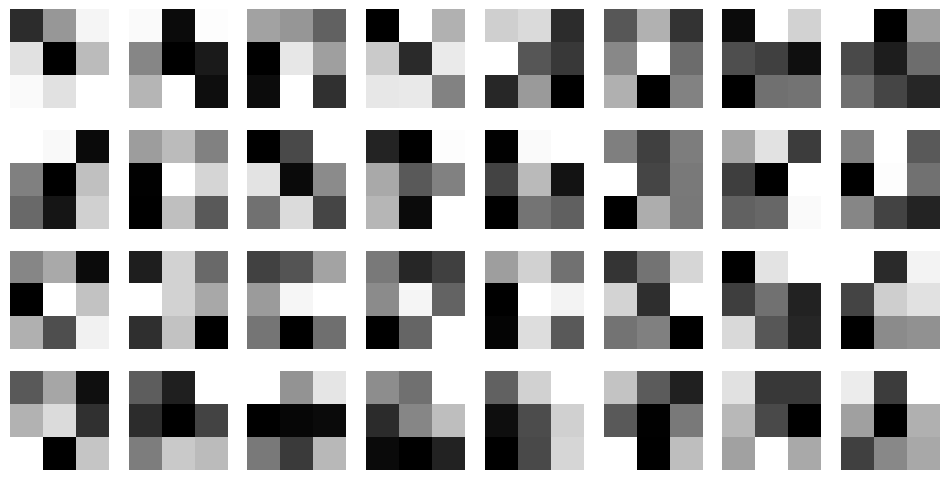

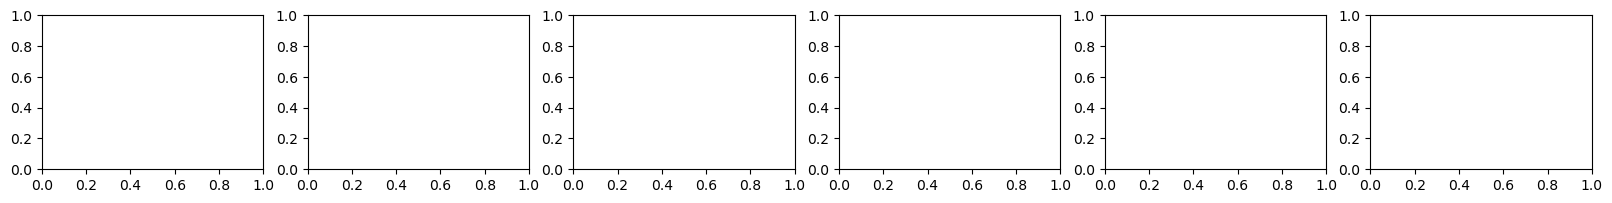

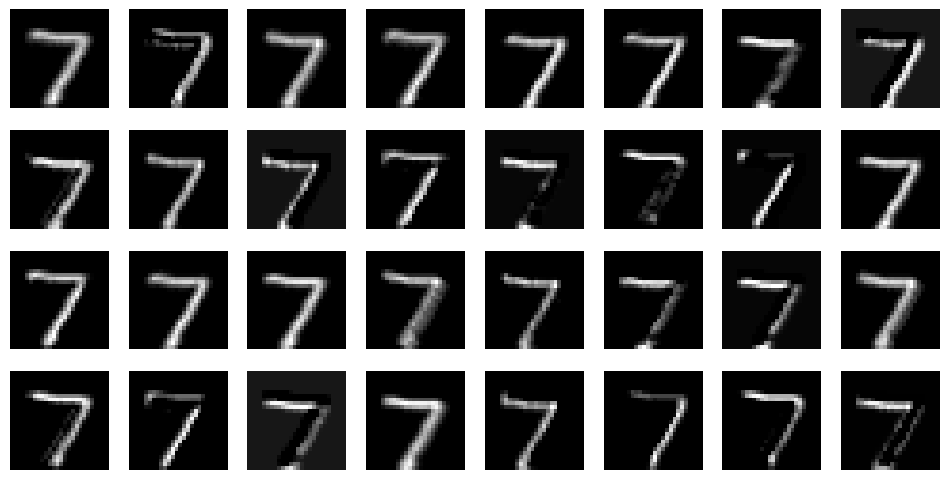

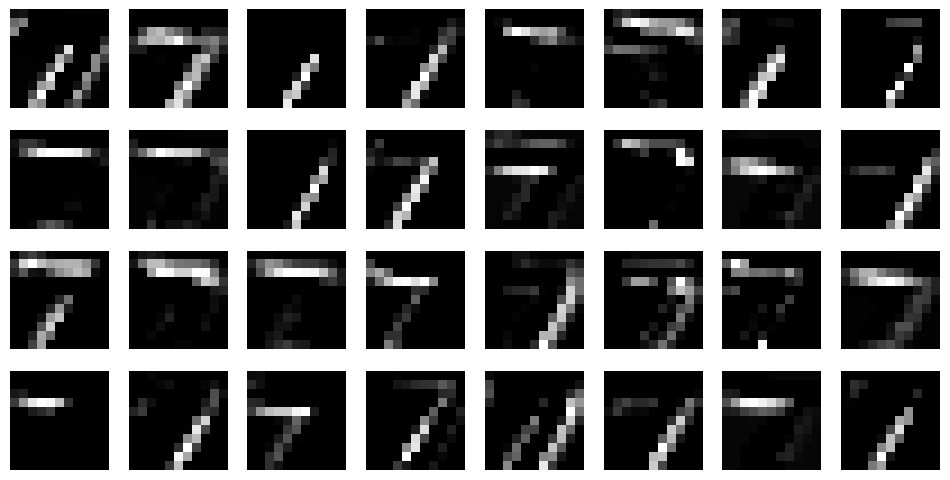

Epoch 1/2
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0665 - accuracy: 0.9797 - val_loss: 0.0436 - val_accuracy: 0.9853
Epoch 2/2
1/1 [==============================] - 0s 51ms/step


2023-02-22 14:25:52.755233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


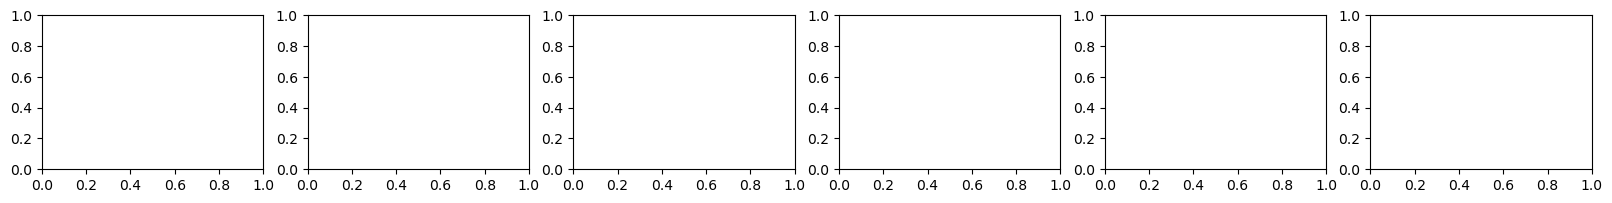

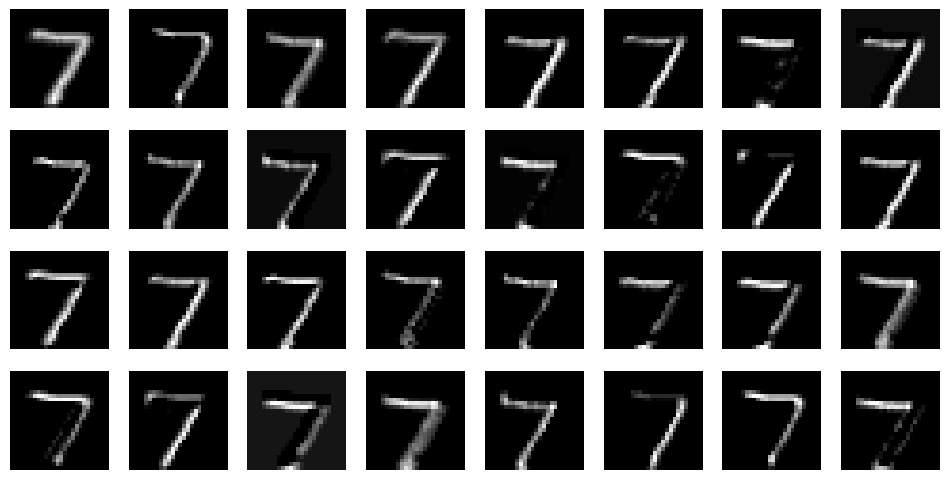

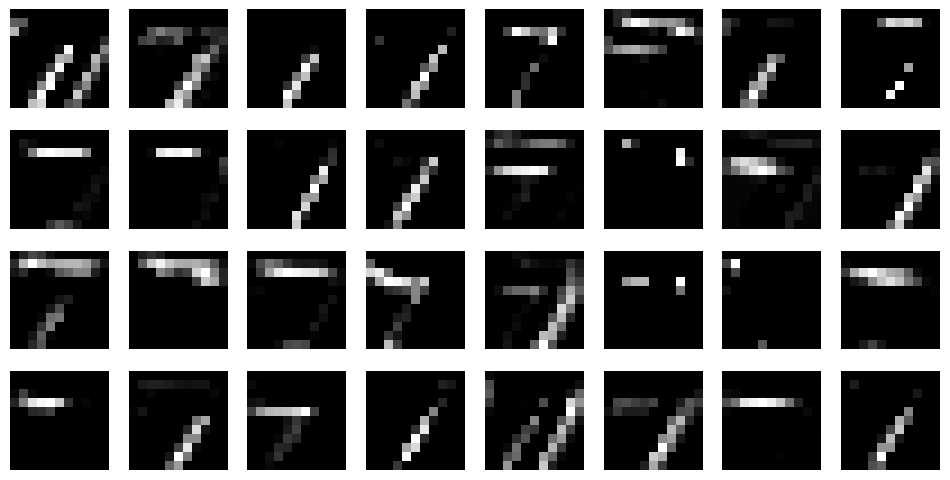

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0375 - accuracy: 0.9881 - val_loss: 0.0387 - val_accuracy: 0.9866
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.0337 - val_accuracy: 0.9883
Epoch 3/3
1/1 [==============================] - 0s 44ms/step


2023-02-22 14:26:33.869956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


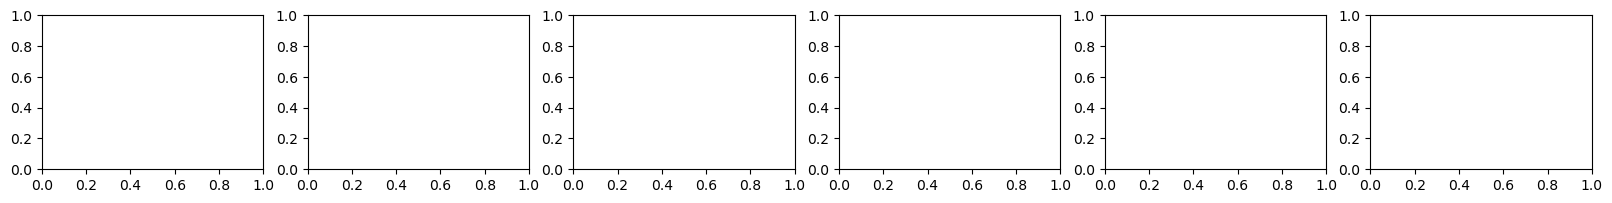

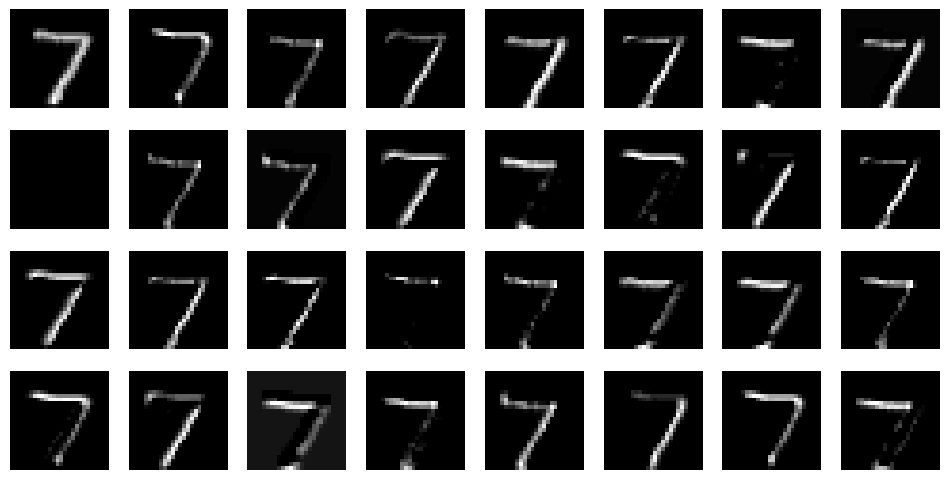

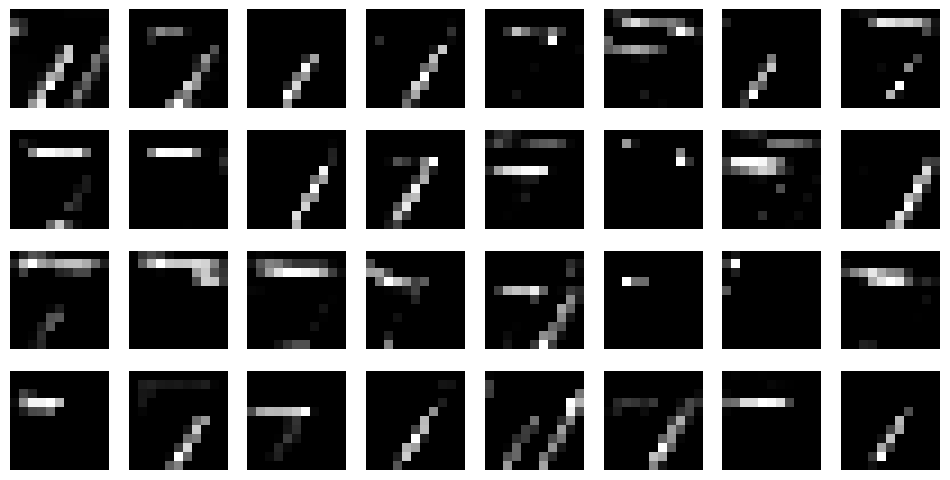

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and preprocess the dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the initial filters
filters, biases = model.layers[0].get_weights()
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))
for i in range(filters.shape[-1]):
    row, col = divmod(i, 8)
    axs[row, col].imshow(filters[:, :, 0, i], cmap='gray')
    axs[row, col].axis('off')


In [ ]:

# Train the model and display the activation maps after each epoch
for epoch in range(1, 4):
    history = model.fit(train_images, train_labels, epochs=epoch,
                        validation_data=(test_images, test_labels))
    # Get the layer outputs and names
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
    img = test_images[0]
    activations = activation_model.predict(np.expand_dims(img, axis=0))
    layer_names = [layer.name for layer in model.layers]

    # Display the activation maps
    fig, axs = plt.subplots(nrows=1, ncols=len(layer_names), figsize=(20, 2))
    for i in range(len(layer_names)):
        if 'conv2d' in layer_names[i]:
            activation = activations[i]
            fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))
            for j in range(activation.shape[-1]):
                row, col = divmod(j, 8)
                axs[row, col].imshow(activation[0, :, :, j], cmap='gray')
                axs[row, col].axis('off')
            plt.show()


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8

In [16]:
# what filter sees

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.0327 - val_accuracy: 0.9903
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.0375 - val_accuracy: 0.9903
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.0368 - val_accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.0359 - val_accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0380 - val_accuracy: 0.9909


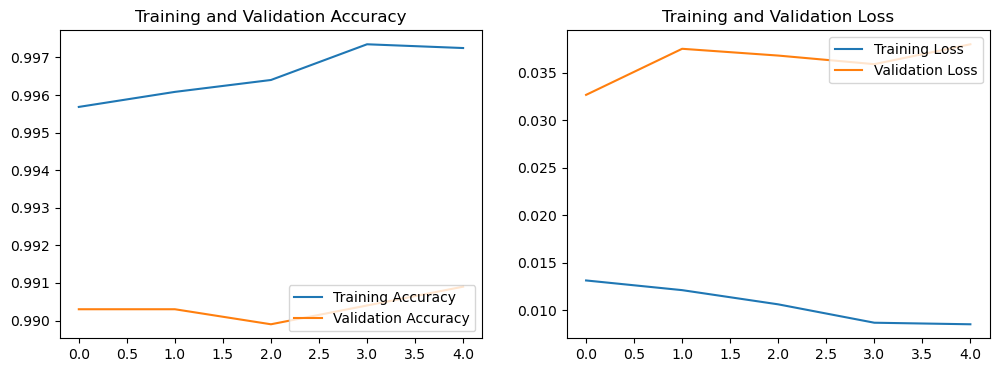

In [4]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# Visualize the model's training progress
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(5)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


2023-02-21 17:43:21.842226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 553ms/step


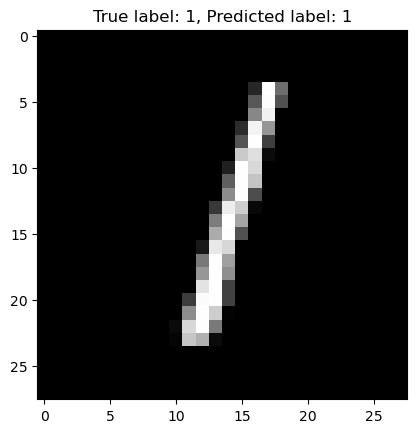

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Select a sample image from the test set
img_index = 2
img = test_images[img_index]
label = test_labels[img_index]

# Reshape the image to match the input shape of the model
img = np.reshape(img, (1, 28, 28, 1))

# Make a prediction using the trained model
pred = model.predict(img)
predicted_label = np.argmax(pred)

# Plot the image and the predicted label
plt.imshow(np.squeeze(img), cmap='gray')
plt.title(f"True label: {label}, Predicted label: {predicted_label}")
plt.show()

#how to output what filter has as an image each epoch


1/1 [==============================] - 0s 9ms/step


2023-02-21 18:45:23.037976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 9ms/step


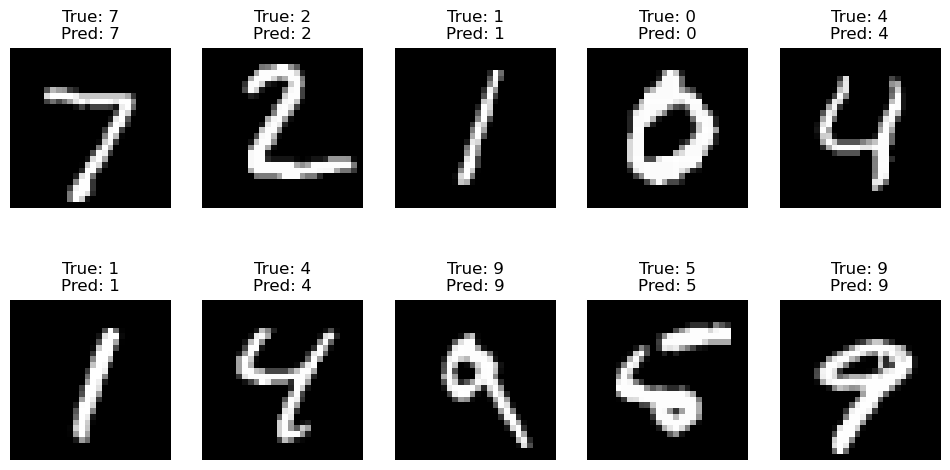

In [5]:
# Display predictions for multiple images
n_cols = 5
n_rows = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 6))
for i in range(n_rows):
    for j in range(n_cols):
        # Select an image from the test set
        img_index = i * n_cols + j
        img = test_images[img_index]
        label = test_labels[img_index]
        
        # Reshape the image to match the input shape of the model
        img = np.reshape(img, (1, 28, 28, 1))
        
        # Make a prediction using the trained model
        pred = model.predict(img)
        predicted_label = np.argmax(pred)
        
        # Display the image and the predicted label
        axs[i, j].imshow(np.squeeze(img), cmap='gray')
        axs[i, j].set_title(f"True: {label}\nPred: {predicted_label}")
        axs[i, j].axis('off')
plt.show()

#hardcode the matrix